In [55]:
from auxiliar_functions import get_ipca_data, get_selic_data, get_dollar_data, get_stocks_data, concat_dataframes
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.figsize"] = 18, 10

In [56]:
ipca = get_ipca_data()
ipca

,Date,IPCA
0,2017-01-01,0.053540
1,2017-01-02,0.053540
2,2017-01-03,0.053540
3,2017-01-04,0.053540
4,2017-01-05,0.053540
...,...,...
3008,2025-03-28,0.054772
3009,2025-03-29,0.054772
3010,2025-03-30,0.054772
3011,2025-03-31,0.054772


In [57]:
selic = get_selic_data()
selic

,Date,SELIC
0,2017-01-02,0.1375
1,2017-01-03,0.1375
2,2017-01-04,0.1375
3,2017-01-05,0.1375
4,2017-01-06,0.1375
...,...,...
2095,2025-05-13,0.1475
2096,2025-05-14,0.1475
2097,2025-05-15,0.1475
2098,2025-05-16,0.1475


In [58]:
cambio = get_dollar_data()
cambio

,Date,Cambio
0,2017-01-02,3.2723
1,2017-01-03,3.2626
2,2017-01-04,3.2327
3,2017-01-05,3.2123
4,2017-01-06,3.2051
...,...,...
2002,2024-12-24,6.1527
2003,2024-12-26,6.1650
2004,2024-12-27,6.1985
2005,2024-12-30,6.1917


In [59]:
bb = get_stocks_data("BBAS3")
bb

,Date,Close
0,2017-01-02,8.264061
1,2017-01-03,8.642155
2,2017-01-04,8.597146
3,2017-01-05,8.576143
4,2017-01-06,8.669160
...,...,...
1987,2024-12-20,23.829037
1988,2024-12-23,23.670704
1989,2024-12-26,23.947786
1990,2024-12-27,23.858725


In [60]:
df = concat_dataframes(bb, selic, cambio, ipca)

In [61]:
df.head()

,Date,Close,SELIC,Cambio,IPCA
0,2017-01-02,8.264061,0.1375,3.2723,0.05354
1,2017-01-03,8.642155,0.1375,3.2626,0.05354
2,2017-01-04,8.597146,0.1375,3.2327,0.05354
3,2017-01-05,8.576143,0.1375,3.2123,0.05354
4,2017-01-06,8.669160,0.1375,3.2051,0.05354


In [62]:
df = df.rename(columns={"Close": "BBAS3"})

In [63]:
df.head()

,Date,BBAS3,SELIC,Cambio,IPCA
0,2017-01-02,8.264061,0.1375,3.2723,0.05354
1,2017-01-03,8.642155,0.1375,3.2626,0.05354
2,2017-01-04,8.597146,0.1375,3.2327,0.05354
3,2017-01-05,8.576143,0.1375,3.2123,0.05354
4,2017-01-06,8.669160,0.1375,3.2051,0.05354


In [64]:
df.index = df["Date"]
df.drop("Date", axis=1, inplace=True)

In [65]:
df.dropna(inplace=True)

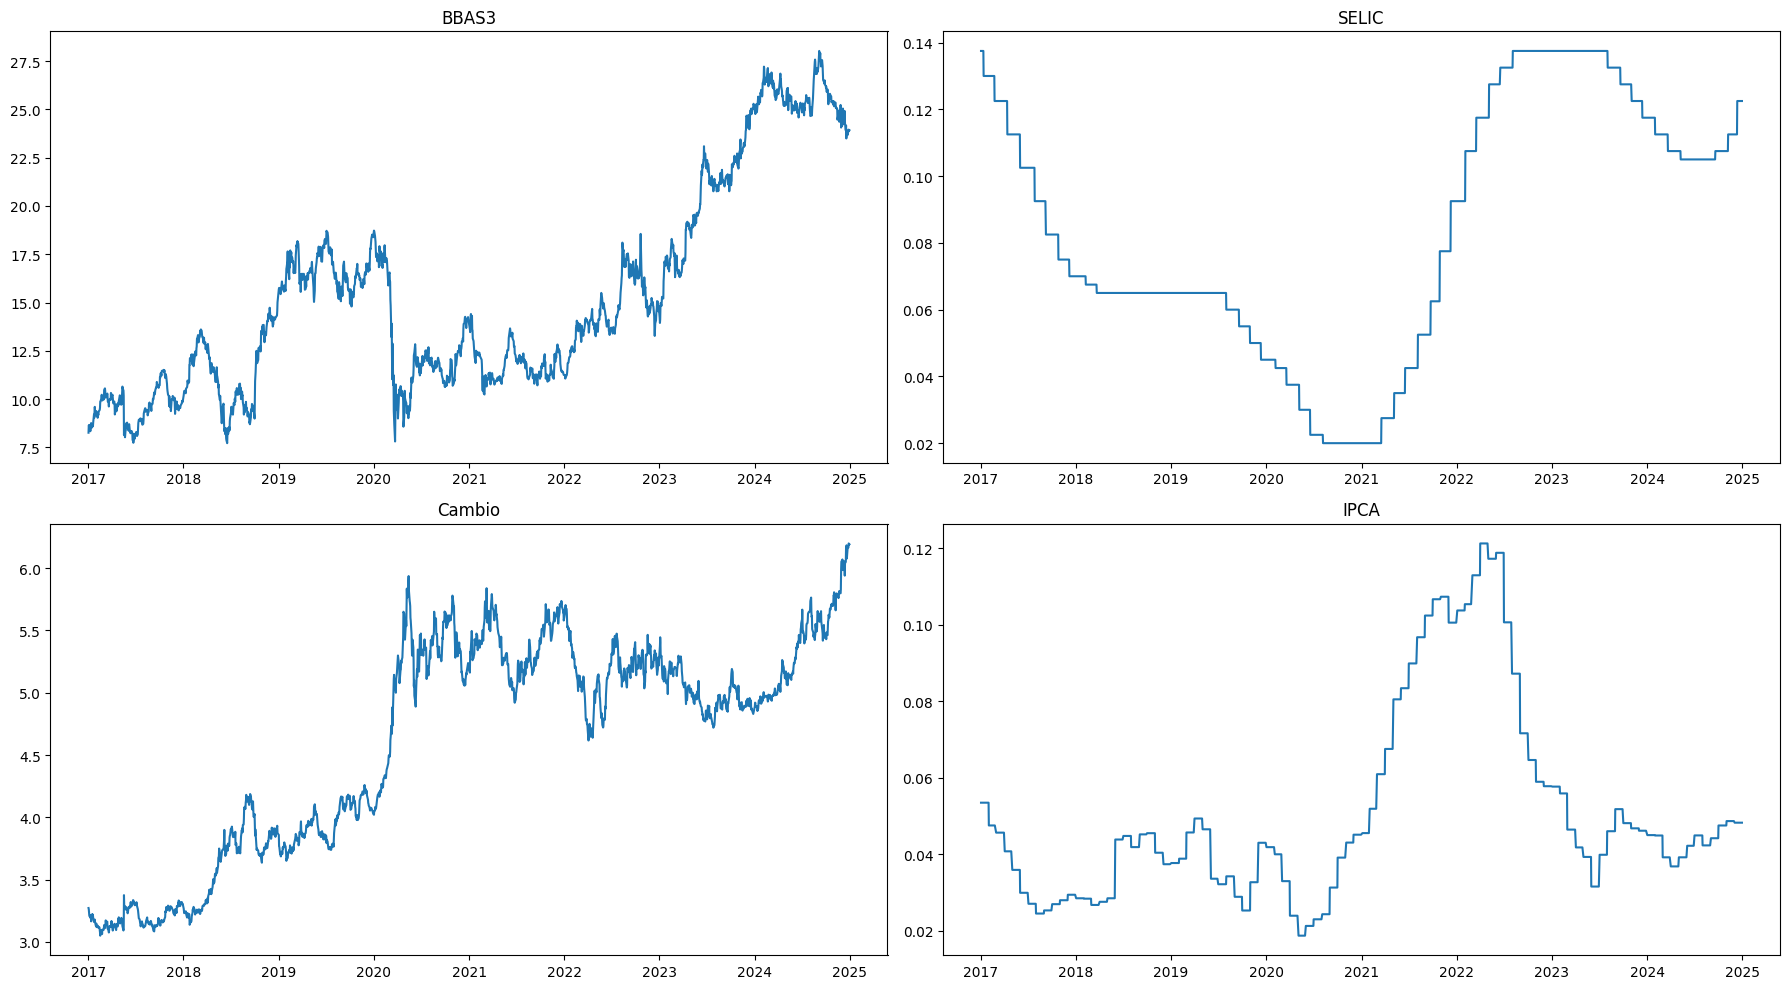

In [66]:
fig, axs = plt.subplots(2, 2)
columns = df.columns
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        axs[i, j].plot(df[columns[idx]])
        axs[i, j].set_title(columns[idx])

plt.tight_layout()
plt.show()

In [67]:
df.describe()

,BBAS3,SELIC,Cambio,IPCA
count,1986.000000,1986.000000,1986.000000,1986.000000
mean,15.304295,0.083883,4.612771,0.050851
std,5.303945,0.038410,0.860030,0.025641
min,7.723138,0.020000,3.050400,0.018775
25%,11.155511,0.056250,3.843025,0.033030
50%,13.857992,0.077500,4.958250,0.044847
75%,17.605332,0.117500,5.293375,0.055963
max,28.020906,0.137500,6.198500,0.121315


In [68]:
df.corr()

,BBAS3,SELIC,Cambio,IPCA
BBAS3,1.000000,0.436828,0.395212,-0.077884
SELIC,0.436828,1.000000,0.020211,0.229061
Cambio,0.395212,0.020211,1.000000,0.427255
IPCA,-0.077884,0.229061,0.427255,1.000000


In [69]:
df.to_csv("data/bbas3_info.csv")